In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

from part2_claim_classifier import ClaimClassifier as CC

Using TensorFlow backend.


# Reducing Nans and preparing data (no centralisation yet)

In [2]:
data = pd.read_table('part3_data.csv',delimiter = ',',index_col = 0)
data.drop_duplicates()
data['drv_sex2'].fillna('N',inplace = True)
data.dropna(inplace = True)
data.head()

,pol_bonus,pol_coverage,pol_duration,pol_sit_duration,pol_pay_freq,pol_payd,pol_usage,pol_insee_code,drv_drv2,drv_age1,...,vh_weight,town_mean_altitude,town_surface_area,population,commune_code,canton_code,city_district_code,regional_department_code,claim_amount,made_claim
id_policy,,,,,,,,,,,,,,,,,,,,,
A00013211-V01,0.5,Maxi,36,6,Biannual,No,Retired,68269,No,77,...,1260,526.0,3216.0,4.8,269.0,20.0,5.0,68,0.0,0
A00040885-V01,0.5,Maxi,15,5,Yearly,No,WorkPrivate,29019,Yes,52,...,1480,57.0,4912.0,141.3,19.0,99.0,1.0,29,0.0,0
A00044495-V01,0.5,Mini,16,6,Monthly,No,Professional,13080,No,52,...,2931,257.0,4488.0,5.3,80.0,27.0,1.0,13,0.0,0
A00047266-V01,0.5,Maxi,11,7,Biannual,No,WorkPrivate,10387,No,67,...,930,109.0,1339.0,61.2,387.0,99.0,3.0,10,0.0,0
A00074532-V01,0.5,Median2,16,6,Biannual,No,WorkPrivate,59153,Yes,60,...,1035,24.0,1849.0,9.7,153.0,19.0,6.0,59,0.0,0


In [3]:
data.columns

Index(['pol_bonus', 'pol_coverage', 'pol_duration', 'pol_sit_duration',
       'pol_pay_freq', 'pol_payd', 'pol_usage', 'pol_insee_code', 'drv_drv2',
       'drv_age1', 'drv_age2', 'drv_sex1', 'drv_sex2', 'drv_age_lic1',
       'drv_age_lic2', 'vh_age', 'vh_cyl', 'vh_din', 'vh_fuel', 'vh_make',
       'vh_model', 'vh_sale_begin', 'vh_sale_end', 'vh_speed', 'vh_type',
       'vh_value', 'vh_weight', 'town_mean_altitude', 'town_surface_area',
       'population', 'commune_code', 'canton_code', 'city_district_code',
       'regional_department_code', 'claim_amount', 'made_claim'],
      dtype='object')

# PCA Mate

In [4]:
# LABEL ENCODE REGIONAL CODE:::::
# le = LabelEncoder()
# le.fit(data.regional_department_code)
# data.regional_department_code = le.transform(data.regional_department_code)

In [5]:
string_cols = data.select_dtypes([object]).columns
PCA_cols = data.select_dtypes(exclude = [object]).columns
data_float = data[PCA_cols[:-2]]

In [6]:
string_cols

Index(['pol_coverage', 'pol_pay_freq', 'pol_payd', 'pol_usage',
       'pol_insee_code', 'drv_drv2', 'drv_sex1', 'drv_sex2', 'vh_fuel',
       'vh_make', 'vh_model', 'vh_type', 'regional_department_code'],
      dtype='object')

In [7]:
CClass = CC()
data_float = CClass._preprocessor(data_float)

In [8]:
data_float = pd.DataFrame(data_float,columns = PCA_cols[:-2])
data_float.head()

,pol_bonus,pol_duration,pol_sit_duration,drv_age1,drv_age2,drv_age_lic1,drv_age_lic2,vh_age,vh_cyl,vh_din,...,vh_sale_end,vh_speed,vh_value,vh_weight,town_mean_altitude,town_surface_area,population,commune_code,canton_code,city_district_code
0,-0.297001,2.444456,-0.310335,1.231348,-0.655684,1.371772,-0.562299,0.202713,-0.102084,0.574579,...,0.353227,0.614167,-0.059226,0.369582,1.567920,0.234728,-0.460222,0.297269,-0.661273,1.863941
1,-0.297001,-0.008958,-0.734593,-0.448084,1.479206,-0.257987,1.299054,-0.223769,1.163321,0.603767,...,-0.533239,0.400263,0.400520,0.981885,-0.534025,0.778584,1.697521,-1.149306,1.642502,-0.980966
2,-0.297001,0.107872,-0.310335,-0.448084,-0.655684,-0.183907,-0.562299,0.913516,1.837051,0.603767,...,0.944204,-1.738775,0.642917,5.020300,0.362327,0.642620,-0.452318,-0.796341,-0.457141,-0.980966
3,-0.297001,-0.476274,0.113923,0.559575,-0.655684,0.705053,-0.562299,-0.223769,-1.071651,-0.476203,...,-0.090006,-0.027545,-0.574838,-0.548872,-0.300973,-0.367168,0.431329,0.980053,1.642502,0.441487
4,-0.297001,0.107872,-0.310335,0.089335,0.780515,-0.109827,0.182242,1.339998,0.560850,0.049188,...,0.796460,0.614167,-0.006476,-0.256637,-0.681923,-0.203627,-0.382764,-0.373942,-0.690435,2.575167


0.973237138504775


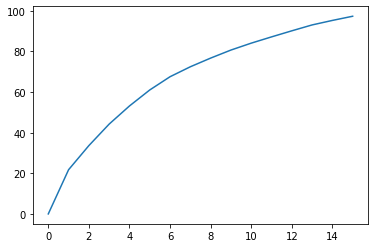

In [9]:
n = 15
pca = PCA(n_components=n)#len(data_float.columns[:-1]))
pca.fit(data_float)
var = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
plt.plot(range(0,n+1), [0] + list(var))
print(np.sum(pca.explained_variance_ratio_))
plt.show()

In [10]:
reduced_data = pca.fit_transform(data_float[PCA_cols[:-2]])
float_dict = {}
for i in range(n):
    float_dict['PCA_{}'.format(i+1)] = reduced_data[:,i]
float_data = pd.DataFrame.from_dict(float_dict)

In [11]:
float_data.head()

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10,PCA_11,PCA_12,PCA_13,PCA_14,PCA_15
0,-0.098695,2.107987,-0.240925,0.536860,-1.812314,-0.993964,1.901234,0.609358,0.116849,0.732286,-0.524575,-1.816881,-0.095113,-0.773170,-0.398106
1,1.922066,0.438257,-0.249490,0.978772,2.815877,1.445478,-0.652536,-0.445752,-0.401549,-0.305521,0.096134,-0.600355,0.004281,0.703923,-0.045384
2,0.316328,1.189830,3.486044,-0.397408,0.003740,1.362716,0.496564,-0.343201,-0.156436,0.353468,0.669784,-1.332994,-3.416049,3.281945,-0.228333
3,-0.806041,-0.333161,-1.025012,1.565557,-0.328628,-1.061668,-0.175257,-0.527822,0.413306,-1.102559,-0.391154,0.418056,-0.149991,-0.316060,0.742587
4,-0.638185,0.663512,1.133887,-0.682260,0.779622,-1.774275,-0.007499,-0.354075,0.113955,1.720321,-1.239744,-0.782161,0.186050,-0.717345,-0.280061


In [12]:
one_hot_strings = string_cols[[1,2,3,5,6,7]]

In [13]:
one_hotted_dict = {}
for hot in one_hot_strings:
    values = data[hot].values
    # # Value encode
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(values)
    # # binary encode
    onehot_encoder = OneHotEncoder(sparse=False,categories='auto')
    integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
    onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
    for n, index in enumerate(np.unique(values)):
        one_hotted_dict['{}_{}'.format(hot,index)] = onehot_encoded[:,n]

In [14]:
one_hot_data = pd.DataFrame.from_dict(one_hotted_dict)
final_dataset = pd.concat([one_hot_data,float_data,pd.DataFrame.from_dict({'made_claim':data['made_claim'].values})],axis = 1)

# Evaluate, Train the thing

In [15]:
final_dataset.head()
labels = final_dataset.values[:,-1]
features = final_dataset.values[:,:-1]

In [16]:
final_dataset

,pol_pay_freq_Biannual,pol_pay_freq_Monthly,pol_pay_freq_Quarterly,pol_pay_freq_Yearly,pol_payd_No,pol_payd_Yes,pol_usage_AllTrips,pol_usage_Professional,pol_usage_Retired,pol_usage_WorkPrivate,...,PCA_7,PCA_8,PCA_9,PCA_10,PCA_11,PCA_12,PCA_13,PCA_14,PCA_15,made_claim
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.901234,0.609358,0.116849,0.732286,-0.524575,-1.816881,-0.095113,-0.773170,-0.398106,0
1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,-0.652536,-0.445752,-0.401549,-0.305521,0.096134,-0.600355,0.004281,0.703923,-0.045384,0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.496564,-0.343201,-0.156436,0.353468,0.669784,-1.332994,-3.416049,3.281945,-0.228333,0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,-0.175257,-0.527822,0.413306,-1.102559,-0.391154,0.418056,-0.149991,-0.316060,0.742587,0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,-0.007499,-0.354075,0.113955,1.720321,-1.239744,-0.782161,0.186050,-0.717345,-0.280061,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79020,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.384821,0.168630,-0.949236,-0.978091,1.724470,0.781111,-0.401353,-1.007745,-0.098151,0
79021,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.738197,-1.602409,0.843621,-0.056939,-0.083731,0.014618,3.665794,1.353980,0.739819,0
79022,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,-0.708222,0.619744,-0.191673,-0.169544,1.259108,-0.199574,-0.324643,-0.191375,-0.432747,0
79023,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.186110,0.434944,-0.822785,1.801622,-0.636899,-1.383021,0.167227,1.109521,-0.308452,0


In [39]:
np.bincount(final_dataset.made_claim.values)

array([71794,  7231], dtype=int64)

In [29]:
cc = CC()
cc.fit(features, labels)

In [23]:
# a = cc.predict(features)
# np.reshape(a,(len(a)))
# (a - labels)/labels